In [269]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from celluloid import Camera
from sklearn.datasets import make_blobs
from kmeans import kmeans
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import random

from scipy.special import softmax

In [270]:
centers = 10
samples = 200
X, _ = make_blobs(n_samples=samples, centers=centers, n_features=2, cluster_std=0.9, random_state=2)
scaler = StandardScaler()
X = scaler.fit_transform(X)

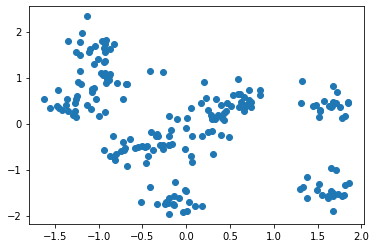

In [271]:
plt.scatter(X[:, 0], X[:,-1])

In [272]:
kmean = kmeans(10)
kmean.fit(X, max_iters=1)

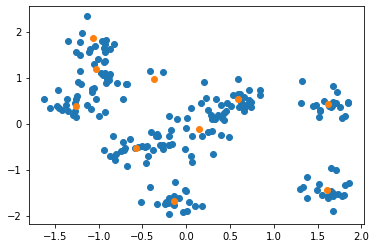

In [273]:
plt.scatter(X[:, 0], X[:,-1])
plt.scatter(kmean.centroids[:,0], kmean.centroids[:,-1])

In [274]:
D = kmean.calcDistances(kmean.centroids, X)

In [275]:
D.shape

(10, 200)

In [276]:
kmean.affiliations

array([3, 5, 0, 4, 0, 8, 2, 5, 3, 9, 9, 0, 3, 2, 2, 9, 2, 8, 8, 5, 9, 2,
       2, 8, 0, 1, 4, 9, 3, 1, 7, 5, 0, 6, 4, 9, 5, 2, 2, 2, 4, 5, 9, 5,
       9, 5, 0, 4, 0, 1, 2, 8, 2, 5, 5, 5, 2, 8, 5, 9, 2, 9, 7, 8, 1, 5,
       5, 3, 0, 4, 3, 7, 7, 8, 4, 5, 3, 4, 6, 9, 3, 5, 9, 8, 7, 8, 6, 6,
       2, 5, 1, 7, 8, 4, 8, 3, 7, 8, 9, 5, 2, 5, 3, 4, 7, 3, 1, 0, 4, 2,
       9, 3, 0, 7, 7, 7, 8, 7, 2, 9, 7, 2, 3, 7, 5, 0, 0, 0, 3, 6, 7, 9,
       8, 5, 3, 9, 0, 0, 3, 9, 5, 9, 8, 9, 9, 7, 4, 4, 8, 9, 5, 3, 5, 3,
       5, 9, 7, 9, 4, 5, 4, 8, 7, 3, 0, 0, 5, 8, 7, 1, 4, 5, 5, 8, 7, 9,
       9, 4, 0, 9, 8, 8, 4, 2, 7, 7, 1, 2, 7, 7, 7, 3, 0, 5, 0, 7, 4, 7,
       4, 9])

In [277]:
D

array([[2.13584611, 1.55294499, 0.09605859, ..., 1.23276234, 1.87451676,
        3.11273914],
       [1.74113168, 2.42473716, 3.66945749, ..., 2.43372532, 4.40324675,
        0.55417081],
       [2.89598687, 1.50154867, 2.81928284, ..., 2.26057862, 1.95677705,
        2.7217984 ],
       ...,
       [0.95745625, 0.88631619, 1.2271971 , ..., 0.12785383, 2.51225801,
        1.89060574],
       [1.88574174, 0.77629824, 2.37271799, ..., 1.44529464, 2.35364062,
        1.72869114],
       [1.06443252, 1.85626784, 2.99133594, ..., 1.76223666, 3.86943714,
        0.17290471]])

In [278]:
W = np.minimum((1/D)**2, np.full(D.shape, 100))

In [279]:
W = [W[i]/sum(W[i]) for i in range(kmean.k)]
W = np.array(W)

In [280]:
sum(W[0])

1.0000000000000009

In [281]:
W[0]

array([2.26095654e-04, 4.27681030e-04, 1.03141189e-01, 3.33298652e-04,
       1.22649459e-02, 1.36390271e-04, 1.70007610e-04, 4.46815555e-04,
       1.46071862e-04, 8.53699114e-05, 1.52229189e-04, 1.03141189e-01,
       1.71978955e-04, 1.38176642e-04, 1.33606529e-04, 1.26097556e-04,
       1.56184550e-04, 1.65776440e-04, 2.23256104e-04, 3.04206190e-04,
       8.82545380e-05, 1.57382380e-04, 1.40703836e-04, 2.02011482e-04,
       1.03141189e-01, 7.62053004e-05, 3.81852484e-04, 1.30582923e-04,
       2.49799400e-04, 8.41440250e-05, 6.99480726e-04, 3.14257239e-04,
       1.52252827e-02, 1.28448346e-04, 4.82532056e-04, 8.80007522e-05,
       1.06095164e-03, 1.55297065e-04, 1.22057203e-04, 1.09173954e-04,
       3.10599110e-04, 4.10052835e-04, 1.13671615e-04, 1.35061627e-03,
       1.38487242e-04, 2.88745410e-04, 7.27422754e-03, 2.51386457e-04,
       1.55499413e-02, 8.05393994e-05, 1.43018710e-04, 2.13345910e-04,
       1.31123479e-04, 2.97713411e-04, 2.53591764e-04, 2.49338877e-04,
      

In [349]:
np.random.choice(np.array(range(200)),p=W[0])

68